## Import libraries

In [45]:
# General and EDA
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ML Algorithms
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# Metric
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

## Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data/housing_dataset_bd.csv")
df

,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300,23.86846,90.39280,Uttara,Sector 10
1,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456,23.81223,90.35967,Mirpur,Section 11
2,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550,23.75349,90.42469,Khilgaon,Chowdhuripara
3,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669,23.78855,90.40081,Banani,Road No 4
4,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835,23.76354,90.43180,Banasree,South Banasree Project
...,...,...,...,...,...,...,...,...,...,...
4699,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4700,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4701,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4702,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur


## Exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4704 entries, 0 to 4703
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    4704 non-null   object 
 1   Price       4704 non-null   int64  
 2   Type        4704 non-null   object 
 3   No. Beds    4500 non-null   float64
 4   No. Baths   4500 non-null   float64
 5   Area        4704 non-null   int64  
 6   Latitude    4704 non-null   float64
 7   Longitude   4704 non-null   float64
 8   Region      4704 non-null   object 
 9   Sub-region  4680 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 367.6+ KB


In [5]:
df.describe()

,Price,No. Beds,No. Baths,Area,Latitude,Longitude
count,4.704000e+03,4500.000000,4500.000000,4704.000000,4704.000000,4704.000000
mean,1.001724e+07,2.981333,2.830889,1460.678146,23.780563,90.391496
std,9.787789e+06,1.456064,0.862690,1067.267396,0.047919,0.035239
min,5.000000e+05,1.000000,1.000000,320.000000,23.644560,90.246430
25%,5.000000e+06,3.000000,2.000000,1050.000000,23.752610,90.365470
50%,7.000000e+06,3.000000,3.000000,1275.000000,23.770260,90.392800
75%,1.080000e+07,3.000000,3.000000,1550.000000,23.812230,90.421790
max,8.131280e+07,46.000000,10.000000,43344.000000,23.893380,90.480410


In [6]:
# Find out the null values for No. of Beds
df[df['No. Beds'].isnull()==True]

,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
22,"East Maniknagar, Maniknagar, Dhaka",8250000,Plot,NaN,NaN,1980,23.72263,90.42987,Maniknagar,East Maniknagar
45,"Hemayetpur, Savar, Dhaka",4000000,Plot,NaN,NaN,3640,23.84152,90.24643,Savar,Hemayetpur
46,"Manda, Mugdapara, Dhaka",24000000,Plot,NaN,NaN,2184,23.72813,90.42969,Mugdapara,Manda
47,"East Maniknagar, Maniknagar, Dhaka",2600000,Plot,NaN,NaN,900,23.72263,90.42987,Maniknagar,East Maniknagar
82,"Sector 9, Purbachal, Dhaka",17500000,Plot,NaN,NaN,2184,23.82653,90.42906,Purbachal,Sector 9
...,...,...,...,...,...,...,...,...,...,...
4571,"Block M, Bashundhara R-A, Dhaka",10500000,Plot,NaN,NaN,2184,23.66803,90.43935,BashundharaR-A,Block M
4577,"Block A, Bashundhara R-A, Dhaka",55000000,Plot,NaN,NaN,3640,23.75669,90.37316,BashundharaR-A,Block A
4578,"Block H, Banasree, Dhaka",26000000,Plot,NaN,NaN,2184,23.76354,90.43180,Banasree,Block H
4638,"Central Road, Dhanmondi, Dhaka",25000000,Plot,NaN,NaN,1353,23.74191,90.38891,Dhanmondi,Central Road


In [7]:
# Find out the null values for No. of Baths
df[df['No. Baths'].isnull()==True]

,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
22,"East Maniknagar, Maniknagar, Dhaka",8250000,Plot,NaN,NaN,1980,23.72263,90.42987,Maniknagar,East Maniknagar
45,"Hemayetpur, Savar, Dhaka",4000000,Plot,NaN,NaN,3640,23.84152,90.24643,Savar,Hemayetpur
46,"Manda, Mugdapara, Dhaka",24000000,Plot,NaN,NaN,2184,23.72813,90.42969,Mugdapara,Manda
47,"East Maniknagar, Maniknagar, Dhaka",2600000,Plot,NaN,NaN,900,23.72263,90.42987,Maniknagar,East Maniknagar
82,"Sector 9, Purbachal, Dhaka",17500000,Plot,NaN,NaN,2184,23.82653,90.42906,Purbachal,Sector 9
...,...,...,...,...,...,...,...,...,...,...
4571,"Block M, Bashundhara R-A, Dhaka",10500000,Plot,NaN,NaN,2184,23.66803,90.43935,BashundharaR-A,Block M
4577,"Block A, Bashundhara R-A, Dhaka",55000000,Plot,NaN,NaN,3640,23.75669,90.37316,BashundharaR-A,Block A
4578,"Block H, Banasree, Dhaka",26000000,Plot,NaN,NaN,2184,23.76354,90.43180,Banasree,Block H
4638,"Central Road, Dhanmondi, Dhaka",25000000,Plot,NaN,NaN,1353,23.74191,90.38891,Dhanmondi,Central Road


In [8]:
df.dropna(axis=0, inplace=True)
df

,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300,23.86846,90.39280,Uttara,Sector 10
1,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456,23.81223,90.35967,Mirpur,Section 11
2,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550,23.75349,90.42469,Khilgaon,Chowdhuripara
3,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669,23.78855,90.40081,Banani,Road No 4
4,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835,23.76354,90.43180,Banasree,South Banasree Project
...,...,...,...,...,...,...,...,...,...,...
4699,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4700,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4701,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4702,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur


In [9]:
# To reset the index after dropping the null values
df.reset_index(drop=True, inplace=True)
df

,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300,23.86846,90.39280,Uttara,Sector 10
1,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456,23.81223,90.35967,Mirpur,Section 11
2,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550,23.75349,90.42469,Khilgaon,Chowdhuripara
3,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669,23.78855,90.40081,Banani,Road No 4
4,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835,23.76354,90.43180,Banasree,South Banasree Project
...,...,...,...,...,...,...,...,...,...,...
4486,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4487,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4488,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4489,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4491 entries, 0 to 4490
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    4491 non-null   object 
 1   Price       4491 non-null   int64  
 2   Type        4491 non-null   object 
 3   No. Beds    4491 non-null   float64
 4   No. Baths   4491 non-null   float64
 5   Area        4491 non-null   int64  
 6   Latitude    4491 non-null   float64
 7   Longitude   4491 non-null   float64
 8   Region      4491 non-null   object 
 9   Sub-region  4491 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 351.0+ KB


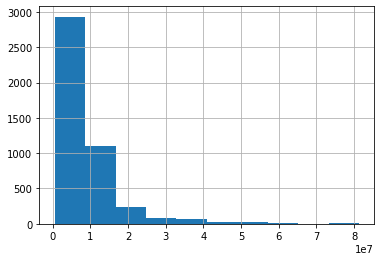

In [11]:
df['Price'].hist()

## Housing category
House prices are binned by 4 categories to visulize price of its surrounding homes.

In [12]:
# Binning median_house_value  
df['housing_category'] = pd.cut(df['Price'], bins=4, labels=['Low', 'Mid', 'High', 'Lavish'])
df

,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region,housing_category
0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300,23.86846,90.39280,Uttara,Sector 10,Low
1,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456,23.81223,90.35967,Mirpur,Section 11,Low
2,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550,23.75349,90.42469,Khilgaon,Chowdhuripara,Low
3,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669,23.78855,90.40081,Banani,Road No 4,Mid
4,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835,23.76354,90.43180,Banasree,South Banasree Project,Low
...,...,...,...,...,...,...,...,...,...,...,...
4486,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low
4487,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low
4488,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low
4489,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low


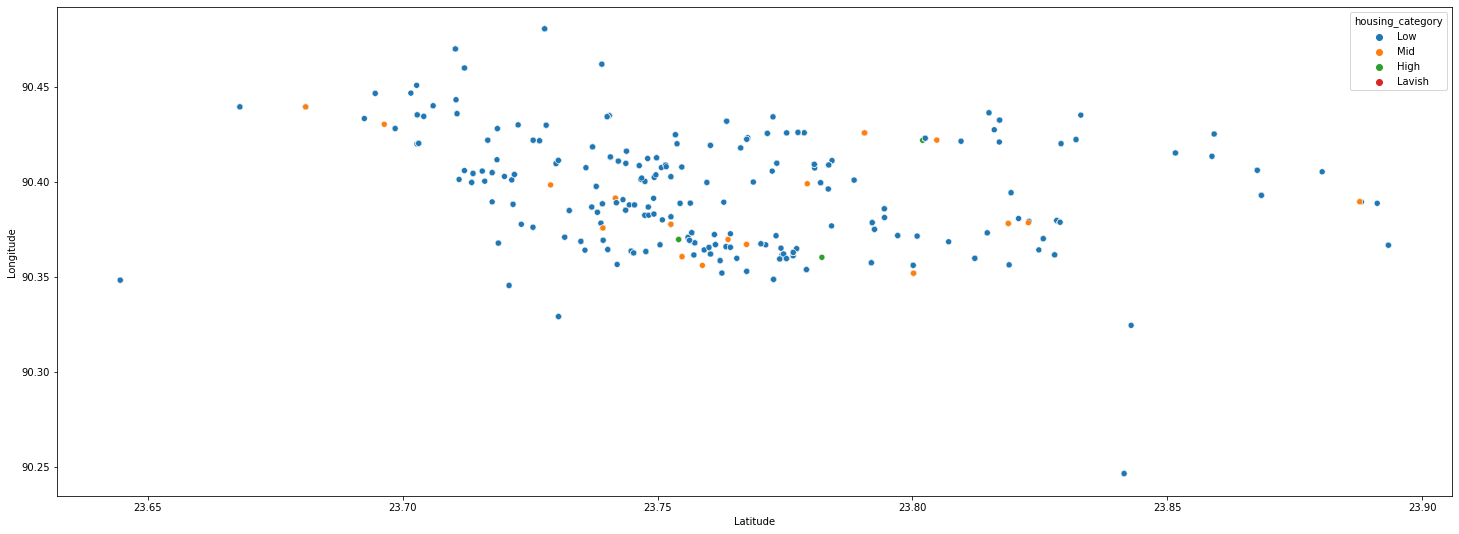

In [13]:
# scatterplot for latitude and longitude
plt.figure(figsize=(25,9))
sns.scatterplot(x='Latitude', y='Longitude', hue='housing_category', data=df)

In [14]:
# Data frames for each category of houses
dflow = df.loc[df['housing_category']=='Low']
dfmid = df.loc[df['housing_category']=='Mid']
dfhigh = df.loc[df['housing_category']=='High']
dflavish = df.loc[df['housing_category']=='Lavish']

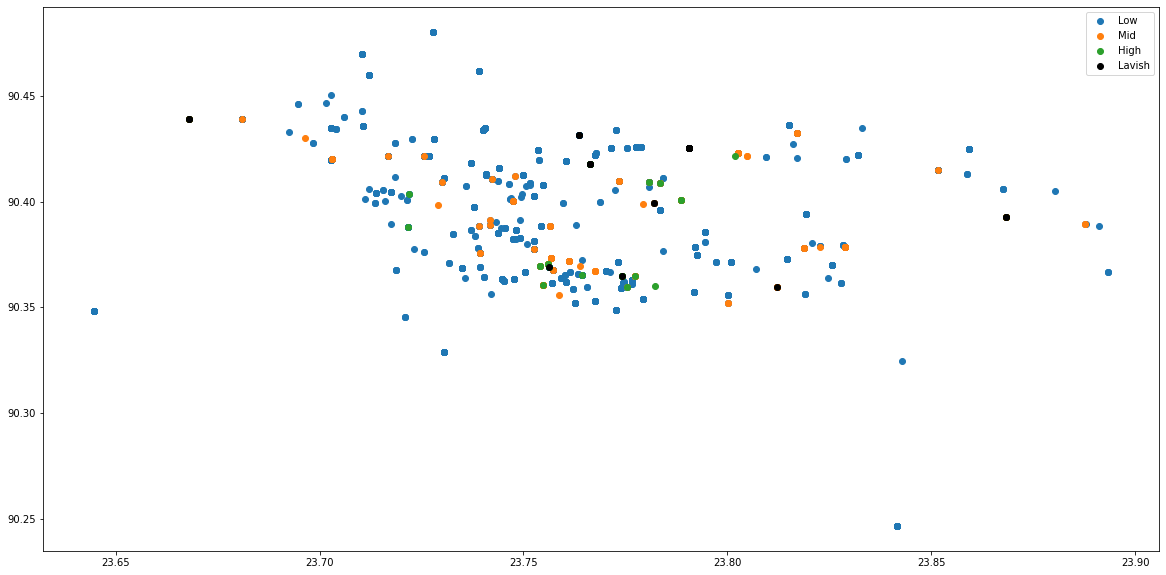

In [15]:
plt.figure(figsize=(20,10))
plt.plot(dflow['Latitude'], dflow['Longitude'], 'o', label='Low')
plt.plot(dfmid['Latitude'], dfmid['Longitude'], 'o', label='Mid')
plt.plot(dfhigh['Latitude'], dfhigh['Longitude'], 'o', label='High')
plt.plot(dflavish['Latitude'], dflavish['Longitude'], 'ko', label='Lavish')
plt.legend()

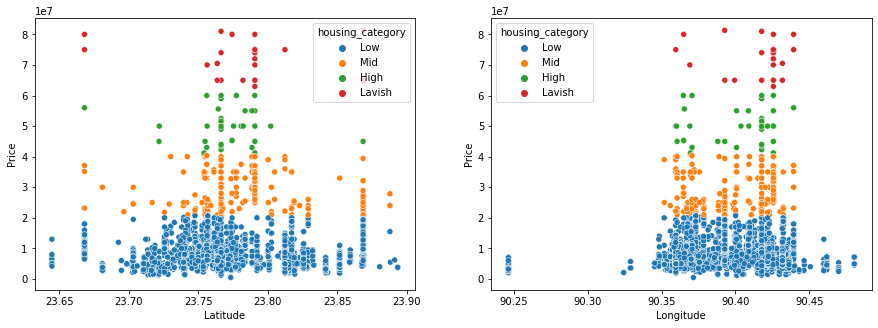

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(x='Latitude', y='Price', hue='housing_category', data=df)
plt.subplot(122)
sns.scatterplot(x='Longitude', y='Price', hue='housing_category', data=df)

Text(0.5, 0, 'Price')

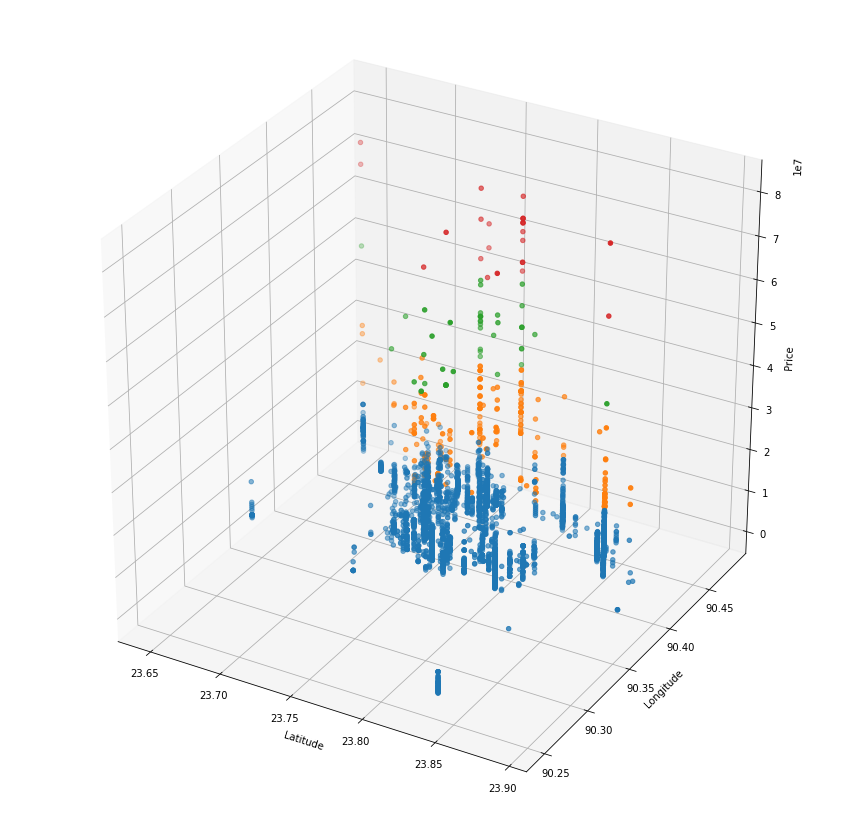

In [17]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(dflow['Latitude'], dflow['Longitude'], dflow['Price'])
ax.scatter3D(dfmid['Latitude'], dfmid['Longitude'], dfmid['Price'])
ax.scatter3D(dfhigh['Latitude'], dfhigh['Longitude'], dfhigh['Price'])
ax.scatter3D(dflavish['Latitude'], dflavish['Longitude'], dflavish['Price'])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Price')

In [18]:
# Take a sample from the total dataset
sample1 = df.loc[(df['Latitude']>=23.60) & (df['Latitude']<=23.74)]
sample1

,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region,housing_category
39,"Majed Sardar Road, Bangshal, Dhaka",1200000,Apartment,2.0,1.0,320,23.721380,90.400910,Bangshal,Majed Sardar Road,Low
40,"Majed Sardar Road, Bangshal, Dhaka",1200000,Apartment,2.0,1.0,320,23.721380,90.400910,Bangshal,Majed Sardar Road,Low
46,"Jurain, Shyampur, Dhaka",22000000,Building,16.0,10.0,5400,23.696360,90.430180,Shyampur,Jurain,Mid
60,"Mahuthtuli, Bangshal, Dhaka",2925000,Apartment,2.0,2.0,650,23.717530,90.404740,Bangshal,Mahuthtuli,Low
73,"Manda, Mugdapara, Dhaka",3200000,Apartment,4.0,2.0,900,23.728130,90.429690,Mugdapara,Manda,Low
...,...,...,...,...,...,...,...,...,...,...,...
4408,"Shiddheswari Lane, Shiddheswari, Dhaka",10000000,Apartment,3.0,3.0,1325,23.737950,90.397490,Shiddheswari,Shiddheswari Lane,Low
4414,"Jigatola, Hazaribag, Dhaka",5500000,Apartment,3.0,2.0,1100,23.739260,90.375630,Hazaribag,Jigatola,Low
4415,"Jigatola, Hazaribag, Dhaka",5500000,Apartment,3.0,2.0,1100,23.739260,90.375630,Hazaribag,Jigatola,Low
4418,"Jigatola, Hazaribag, Dhaka",25000000,Building,8.0,8.0,4500,23.739260,90.375630,Hazaribag,Jigatola,Mid


In [19]:
sample1low = sample1.loc[sample1['housing_category']=='Low']
sample1mid = sample1.loc[sample1['housing_category']=='Mid']
sample1high = sample1.loc[sample1['housing_category']=='High']
sample1lavish = sample1.loc[sample1['housing_category']=='Lavish']

Text(0.5, 0, 'Price')

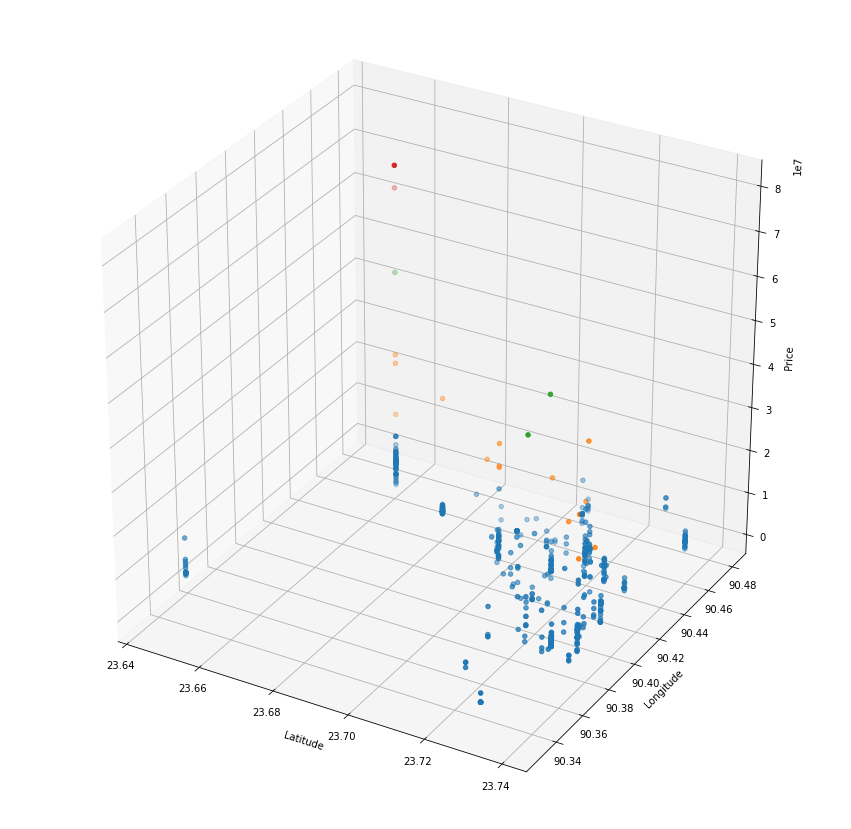

In [20]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(sample1low['Latitude'], sample1low['Longitude'], sample1low['Price'])
ax.scatter3D(sample1mid['Latitude'], sample1mid['Longitude'], sample1mid['Price'])
ax.scatter3D(sample1high['Latitude'], sample1high['Longitude'], sample1high['Price'])
ax.scatter3D(sample1lavish['Latitude'], sample1lavish['Longitude'], sample1lavish['Price'])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Price')

### Find correlation between pairwise features

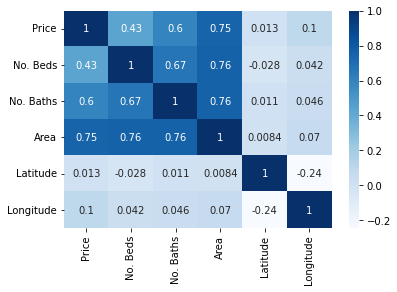

In [21]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

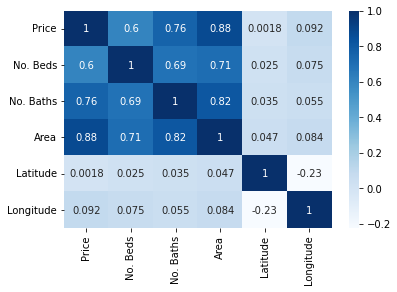

In [22]:
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='Blues')

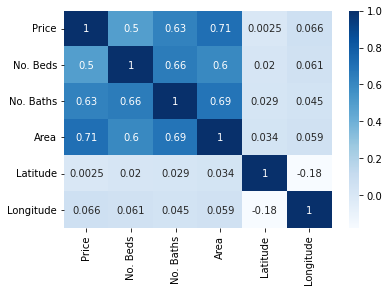

In [23]:
sns.heatmap(df.corr(method='kendall'), annot=True, cmap='Blues')

## Model


### Select feature and set target



In [57]:
X = df.drop(['Price', 'housing_category', 'Location', 'Type', 'Region', 'Sub-region'], axis=1)
y = df['Price']
total_pred = 0
list_pred = [] # For stroing the prediction of all the models

### Split data into train-test sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Scale data

In [26]:
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[0.04444444, 0.22222222, 0.06356383, 0.45305844, 0.51876229],
       [0.04444444, 0.22222222, 0.03989362, 0.67386062, 0.48397299],
       [0.04444444, 0.22222222, 0.05425532, 0.89984728, 0.62556629],
       ...,
       [0.04444444, 0.11111111, 0.04787234, 0.27819307, 0.67480127],
       [0.04444444, 0.22222222, 0.05319149, 0.44887871, 0.52448927],
       [0.04444444, 0.11111111, 0.02659574, 0.67386062, 0.48397299]])

### KNN Regressor

In [27]:
neigh = KNeighborsRegressor(n_neighbors=10, weights='uniform', algorithm='auto', p=1)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10, p=1)

In [58]:
y_pred_1 = neigh.predict(X_test)
list_pred.append(y_pred_1)
total_pred += y_pred_1

#### Evaluation metric for KNN

In [56]:
mae_knn=mean_absolute_error(y_test, y_pred_1)
mse_knn=mean_squared_error(y_test, y_pred_1)
rmse_knn=math.sqrt(mse_knn)
print(mae_knn, mse_knn, rmse_knn)

2155091.5210384354 18969551699744.426 4355404.883560703


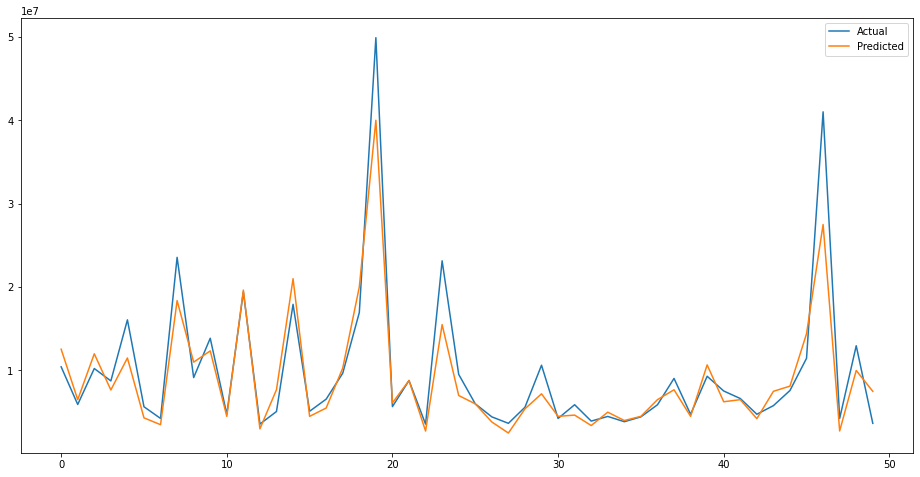

In [29]:
test = pd.DataFrame({'Predicted':y_pred_1,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

###Decision Tree Regressor

In [30]:
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [59]:
y_pred_2 = regr_1.predict(X_test)
list_pred.append(y_pred_2)
total_pred += y_pred_2

#### Evaluation metric for DecisionTree

In [54]:
mae_dt=mean_absolute_error(y_test, y_pred_2)
mse_dt=mean_squared_error(y_test, y_pred_2)
rmse_dt=math.sqrt(mse_dt)
print(mae_dt, mse_dt, rmse_dt)

1819417.1572852086 18029374832435.867 4246101.133090905


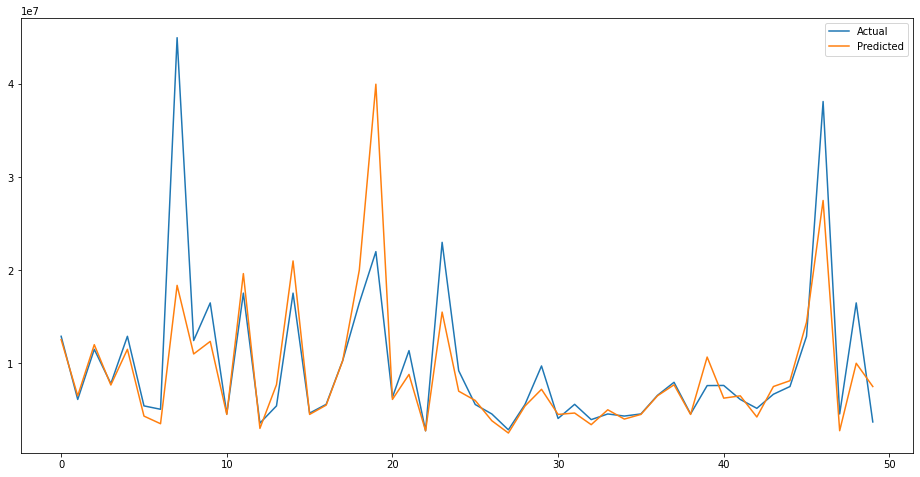

In [32]:
test = pd.DataFrame({'Predicted':y_pred_2,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

### Adaboost Regressor

In [33]:
regr_2 = AdaBoostRegressor(n_estimators=50, learning_rate=0.3, loss='exponential')
regr_2.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.3, loss='exponential')

In [60]:
y_pred_3 = regr_2.predict(X_test)
list_pred.append(y_pred_3)
total_pred += y_pred_3

#### Evaluation metric for AdaBoost

In [52]:
mae_ad=mean_absolute_error(y_test, y_pred_3)
mse_ad=mean_squared_error(y_test, y_pred_3)
rmse_ad=math.sqrt(mse_ad)
print(mae_ad, mse_ad, rmse_ad)

2586025.7360858307 18731298689859.863 4327967.038906357


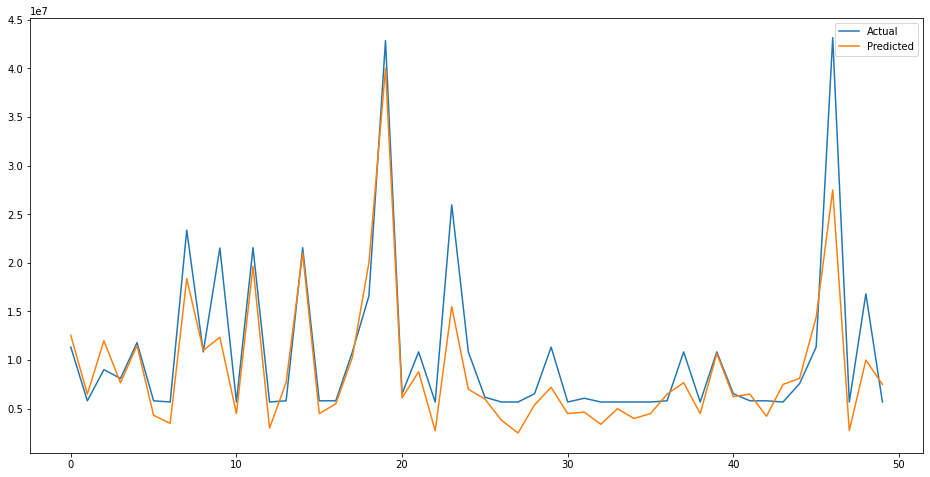

In [35]:
test = pd.DataFrame({'Predicted':y_pred_3,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

### RandomForestRegressor

In [36]:
regr_3 = RandomForestRegressor()
regr_3.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
y_pred_4 = regr_3.predict(X_test)
list_pred.append(y_pred_4)
total_pred += y_pred_4

#### Evaluation metric for RandomForest

In [50]:
mae_rf=mean_absolute_error(y_test, y_pred_4)
mse_rf=mean_squared_error(y_test, y_pred_4)
rmse_rf=math.sqrt(mse_rf)
print(mae_rf, mse_rf, rmse_rf)

1475283.3236104646 12029159321730.87 3468307.847024377


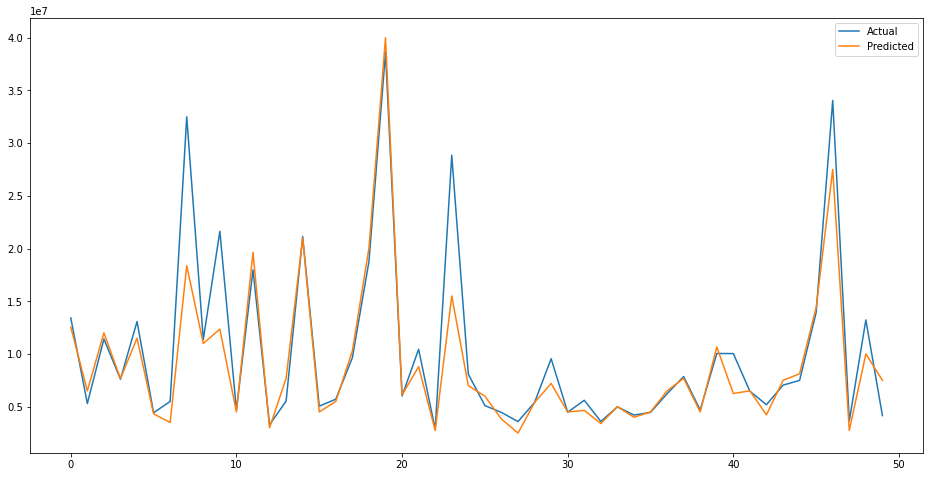

In [38]:
test = pd.DataFrame({'Predicted':y_pred_4,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

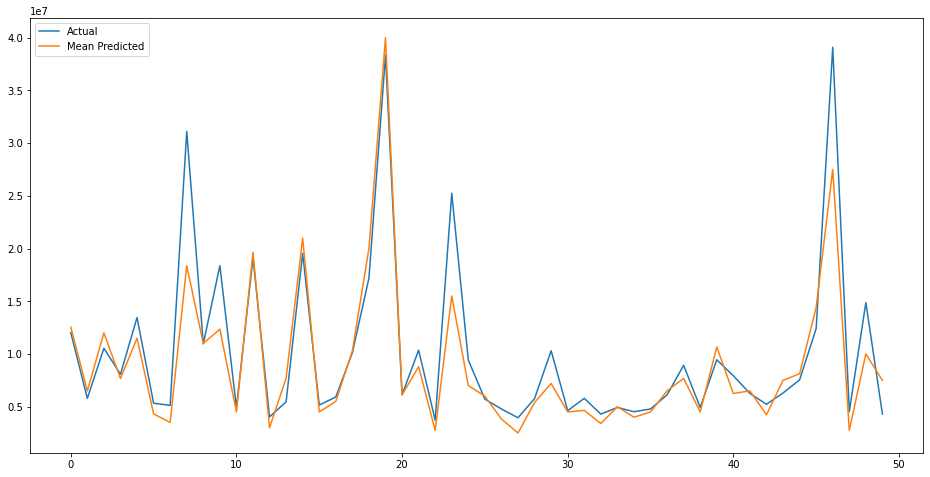

In [39]:
# Mean of all model predictions
mean_pred = total_pred/4
test = pd.DataFrame({'Predicted':mean_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Mean Predicted'])

In [47]:
mae_mean=mean_absolute_error(y_test, mean_pred)
mse_mean=mean_squared_error(y_test, mean_pred)
rmse_mean=math.sqrt(mse_mean)
print(mae_mean, mse_mean, rmse_mean)

1827841.4025335487 13388550118353.139 3659036.7746653133
